# Inspecting Markov Chain Behaviour
**Author:** Prof. Gwen Eadie
**Date:** 2025-05-06

## Intended Learning Outcome 

_Understand how the width of the proposal distribution affects the efficiency and sampling of a posterior distribution_


In this exercise, we will perform Bayesian inference for a linear regression and play around with the width of the proposal distribution to see how this affects the resulting Markov chain. 

For learning purposes, we won't use an out-of-the-box MCMC package to do the sampling. We will write our own, very simplistic, Metroplis algorithm (everyone should do this at least once, it's a good learning experience!). We will assume uniform priors on the parameters, meaning that these are constants and can be ignored/left out in the code. (However, in practice, you should always think carefully about the priors and definitely include them!!).


In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set(style="whitegrid")


### Step 1

Simulate some mock data ($n=100$) that follows the line $$y = \beta_0 + \beta_1 x$$ and set the parameters to some true values of your choice. When simulating the data, make sure to include some Gaussian, random noise. I recommend setting $\sigma=1$, although you can choose how noisy you want your data to be.

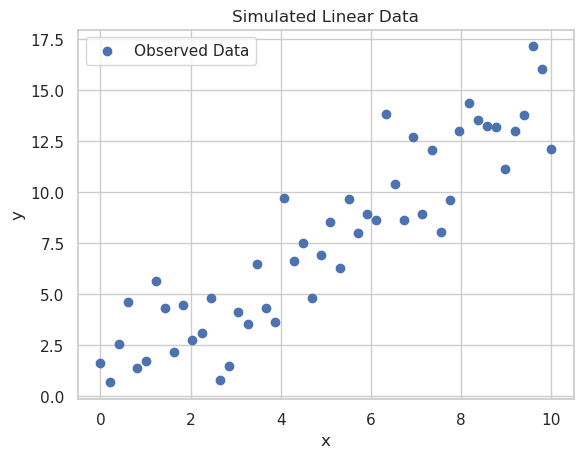

In [10]:

# Simulated data: y = mx + b + noise
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_m = 1.5
true_b = 0.65
y = true_m * x + true_b + np.random.normal(0, 2, size=len(x))

# plot the data just as a check
plt.scatter(x, y, label="Observed Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulated Linear Data")
plt.legend()
plt.show()


### Step 2

Write the log-likelihood function that will take in the parameters for the intercept and slope, and the mock data. 


In [3]:

def log_likelihood(m, b, sigma=2.0):
    y_model = m * x + b
    return np.sum(norm.logpdf(y, loc=y_model, scale=sigma))


### Step 3

Decide on the length of the chain, the initial values of the parameters for the chain, and the width (standard deviation) of the proposal distribution. We will use a Gaussian proposal distribution. 

In [ ]:
# length of chain


# make an empty matrix that will be filled as the Markov chain is made

# Initial values


# Proposal standard deviations for each parameter

### Step 4


Write a basic Metroplis algorithm to sample from the posterior distribution (remember, we are assuming constant priors so you can leave those out since they are constants). For the step where you compute the acceptance ratio $r$, you need to calculate

$$r = \frac{p(\beta_0^*, \beta_1^*|x)}{p(\beta_{0, i-1}, \beta_{1,i-1}|x)}$$
I recommend doing this in log space, i.e.,

$$\log{r} = \log{(p(\beta_0^*, \beta_1^*|x))} - \log{(p(\beta_{0, i-1}, \beta_{1,i-1}|x))}$$.


Then, compare $\log{r}$ to $\log{(x)}$, where $x$ is a random number drawn from $U(0,1)$. This will be more computationally efficient.

In [4]:
# write a function to perform the Metropolis algorithm


In [5]:
# generate samples using the above function and the mock data generated at the beginning

# Discard burn-in
burnin = 1000
m_chain = samples[burnin:, 0]
b_chain = samples[burnin:, 1]


### Step 5

Make a trace plot of the chain to look at its behaviour.

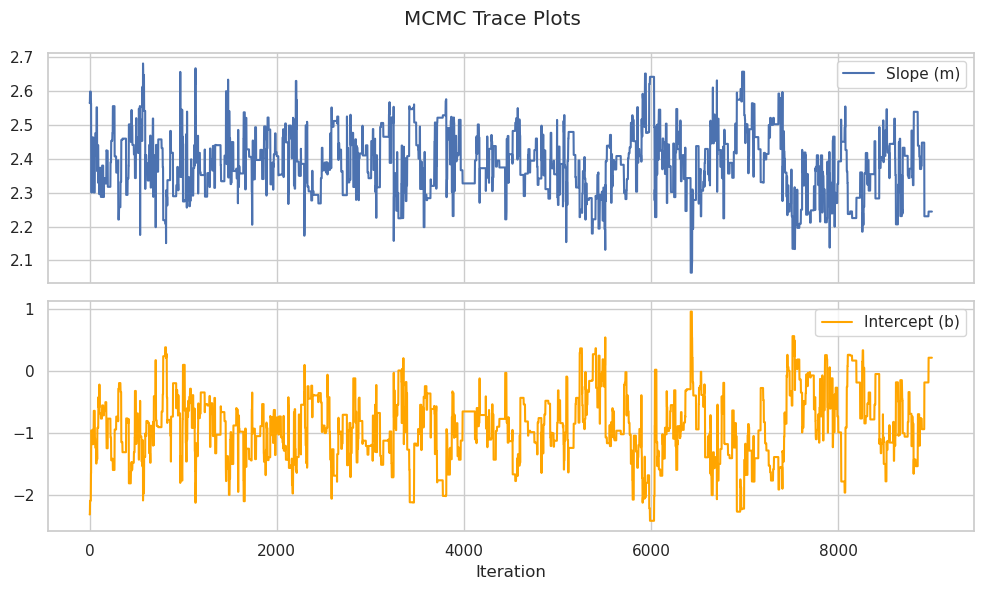

In [6]:
# Look at the Markov Chain trace plots



Now try different proposal distribution widths and see how this affects the chain. 

In [9]:
# try changing the standard deviation of the proposal distributions

## Step 6

Once you've settled on a good proposal distribution and the trace plots look good, then discard the burn-in and look at the marginal distribution for each parameter. Were you able to recover the true parameter values? 

Also look at the full posterior distribution --- notice that the intercept and slope are highly correlated! Using a joint proposal distribution for $\beta_0$ and $\beta_1$ with some covariance matrix would be more efficient.

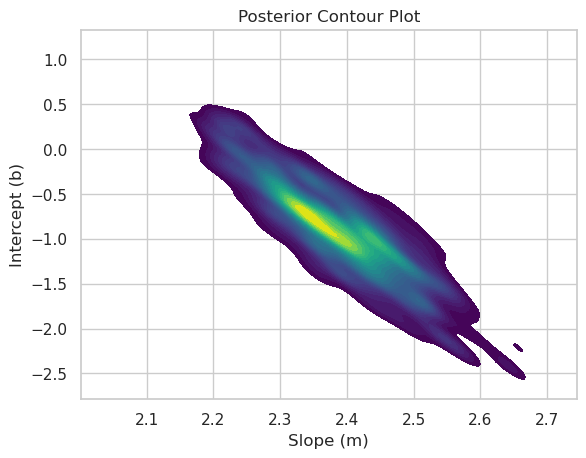

In [7]:
# 
sns.kdeplot(x=m_chain, y=b_chain, fill=True, cmap="viridis", levels=30)
plt.xlabel("Slope (m)")
plt.ylabel("Intercept (b)")
plt.title("Posterior Contour Plot")
plt.show()
